# Level 1 
## Task 1-Top Cuisines

In [7]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Dataset.csv")


cuisines_series = df['Cuisines'].dropna().str.split(', ', expand=True).stack()


top_cuisines_counts = cuisines_series.value_counts().nlargest(3)


total_restaurants = len(df)
percentage_per_cuisine = (top_cuisines_counts / total_restaurants) * 100


print("Top 3 Cuisines:")
print(top_cuisines_counts)
print("\nPercentage of Restaurants Serving Each Top Cuisine:")
print(percentage_per_cuisine)

Top 3 Cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
dtype: int64

Percentage of Restaurants Serving Each Top Cuisine:
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
dtype: float64


## TASK 2-City Analysis

In [8]:

city_with_highest_restaurants = df['City'].value_counts().idxmax()
print(f"The city with the highest number of restaurants is: {city_with_highest_restaurants}")


average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()


city_with_highest_avg_rating = average_rating_per_city.idxmax()
highest_avg_rating = average_rating_per_city.max()

print(f"The city with the highest average rating is: {city_with_highest_avg_rating}")
print(f"The highest average rating is: {highest_avg_rating}")


The city with the highest number of restaurants is: New Delhi
The city with the highest average rating is: Inner City
The highest average rating is: 4.9


## TASK 3-Price Range Distribution

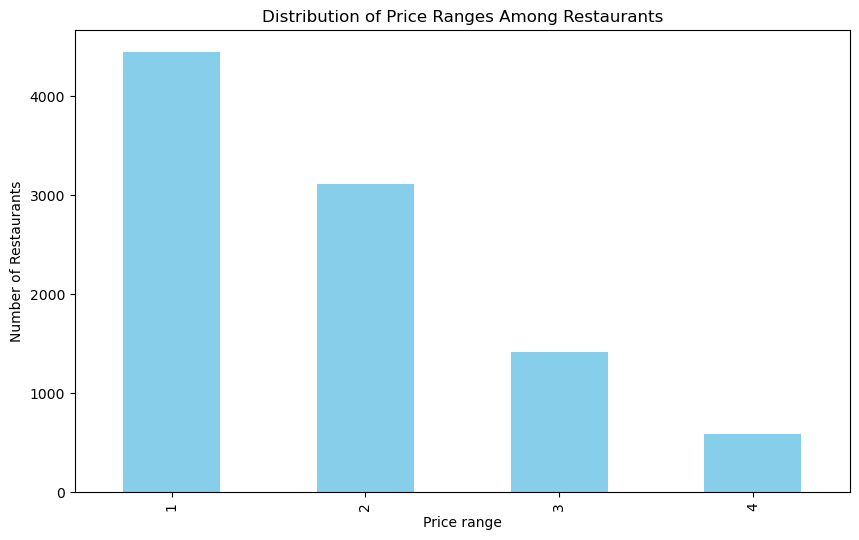

Percentage of Restaurants in Each Price Range:
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64


In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['Price range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price range')
plt.ylabel('Number of Restaurants')
plt.show()


price_range_percentages = (df['Price range'].value_counts() / len(df)) * 100
print("Percentage of Restaurants in Each Price Range:")
print(price_range_percentages)

## Task 4-Online Delivery 

In [10]:

online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print("Percentage of Restaurants Offering Online Delivery:")
print(online_delivery_percentage)


average_ratings_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_ratings_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print(f"\nAverage Rating of Restaurants with Online Delivery: {average_ratings_with_delivery:.2f}")
print(f"Average Rating of Restaurants without Online Delivery: {average_ratings_without_delivery:.2f}")


Percentage of Restaurants Offering Online Delivery:
No     74.34
Yes    25.66
Name: Has Online delivery, dtype: float64

Average Rating of Restaurants with Online Delivery: 3.25
Average Rating of Restaurants without Online Delivery: 2.47


# Level 2
## Task 1-Restaurant Ratings

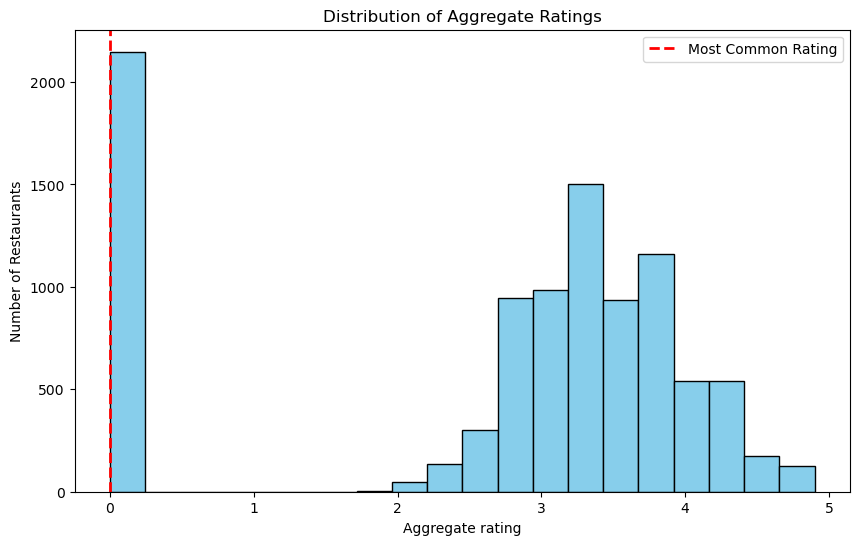

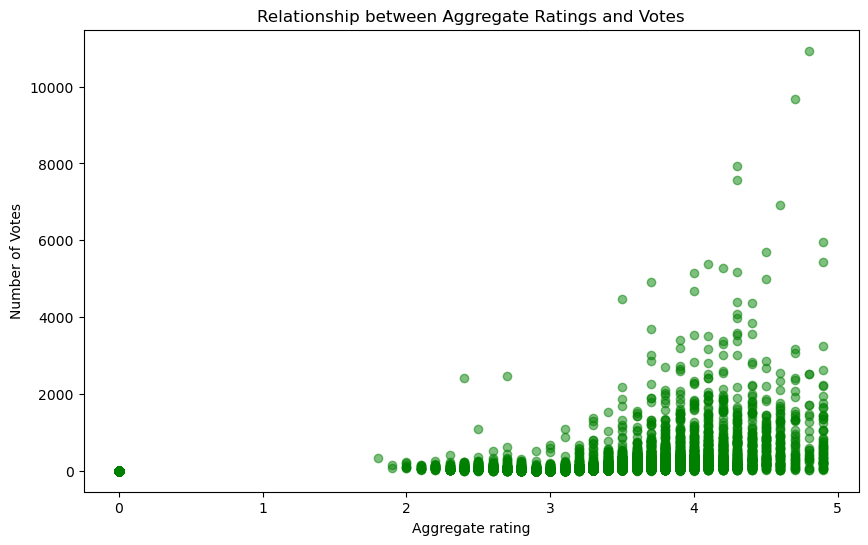


The most common rating range is: 0.0

Average Number of Votes Received by Restaurants: 156.91


In [12]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()

most_common_rating = rating_counts.idxmax()
average_votes = df['Votes'].mean()
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.axvline(most_common_rating, color='red', linestyle='dashed', linewidth=2, label='Most Common Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Aggregate rating'], df['Votes'], color='green', alpha=0.5)
plt.title('Relationship between Aggregate Ratings and Votes')
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Votes')
plt.show()

print(f"\nThe most common rating range is: {most_common_rating}")
print(f"\nAverage Number of Votes Received by Restaurants: {average_votes:.2f}")


## TASK 2-Cuisine Combination 

Most Common Cuisine Combinations:
North Indian, Chinese: 1514 occurrences
North Indian, Mughlai: 727 occurrences
North Indian, Fast Food: 377 occurrences
Chinese, Fast Food: 331 occurrences
North Indian, South Indian: 314 occurrences


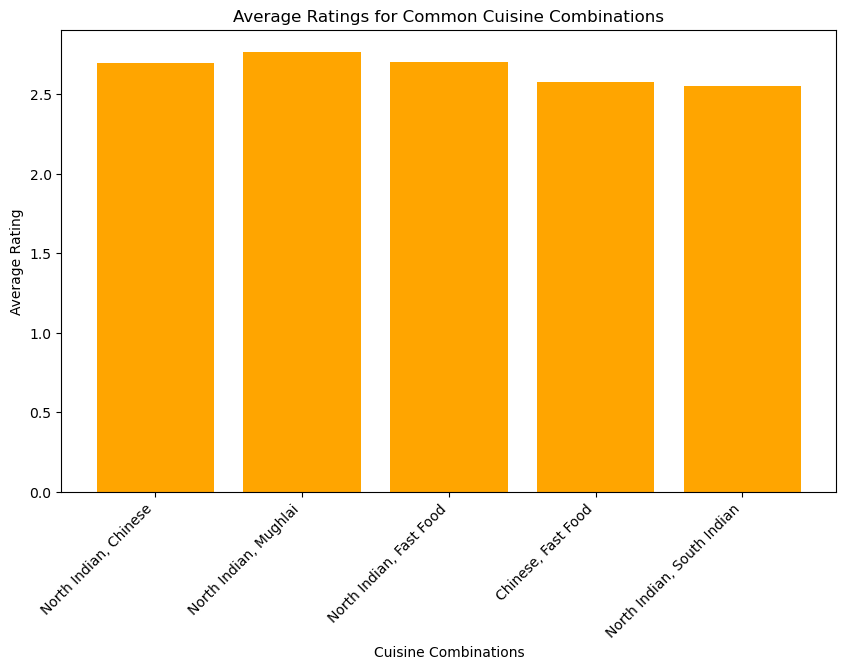

In [13]:
from itertools import combinations
from collections import Counter

cuisines_list = df['Cuisines'].apply(lambda x: [] if pd.isna(x) else x.split(', '))
all_cuisine_combinations = Counter()

for cuisines in cuisines_list:
   
    combinations_set = set(combinations(cuisines, 2)) 
    all_cuisine_combinations.update(combinations_set)


most_common_cuisine_combinations = all_cuisine_combinations.most_common(5)
print("Most Common Cuisine Combinations:")
for combination, count in most_common_cuisine_combinations:
    print(f"{', '.join(combination)}: {count} occurrences")


cuisine_combination_ratings = {}

for combination, _ in most_common_cuisine_combinations:
   
    subset_df = df[df['Cuisines'].apply(lambda x: all(cuisine in x for cuisine in combination) if not pd.isna(x) else False)]
    average_rating = subset_df['Aggregate rating'].mean()
    cuisine_combination_ratings[', '.join(combination)] = average_rating


plt.figure(figsize=(10, 6))
plt.bar(cuisine_combination_ratings.keys(), cuisine_combination_ratings.values(), color='orange')
plt.title('Average Ratings for Common Cuisine Combinations')
plt.xlabel('Cuisine Combinations')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Task-3-Geographic Analysis

In [15]:
!pip install folium


In [17]:
import folium
latitude_column = 'Latitude'
longitude_column = 'Longitude'

center_latitude = df[latitude_column].mean()
center_longitude = df[longitude_column].mean()
restaurant_map = folium.Map(location=[center_latitude, center_longitude], zoom_start=12)

for index, row in df.iterrows():
    folium.Marker(
        location=[row[latitude_column], row[longitude_column]],
        popup=row['Restaurant Name'], 
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(restaurant_map)

restaurant_map.save('restaurant_map.html')

print("Map saved as 'restaurant_map.html'")

Map saved as 'restaurant_map.html'


In [20]:
!pip install scikit-learn
from sklearn.cluster import KMeans


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


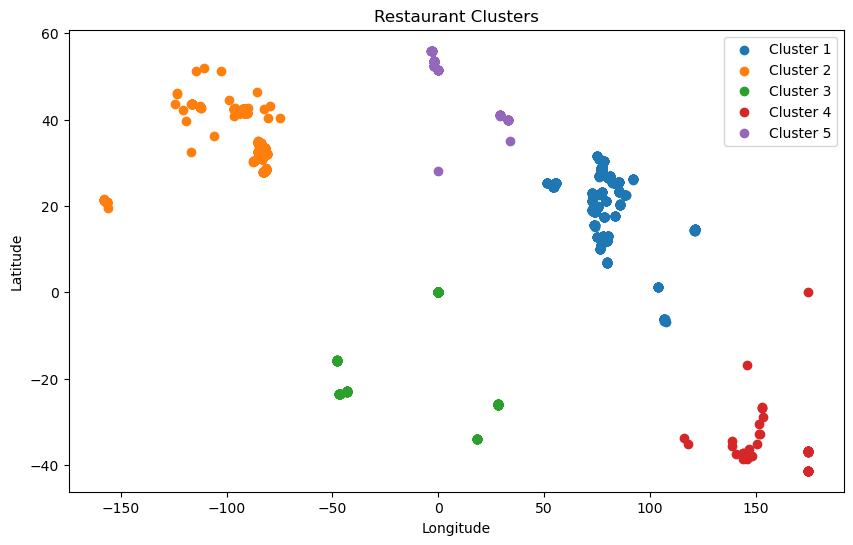

In [21]:

latitude_column = 'Latitude'
longitude_column = 'Longitude'
coordinates = df[[latitude_column, longitude_column]]
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(coordinates)

plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_df = df[df['Cluster'] == cluster]
    plt.scatter(cluster_df[longitude_column], cluster_df[latitude_column], label=f'Cluster {cluster + 1}')

plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## TASK-4 Restaurant Chains


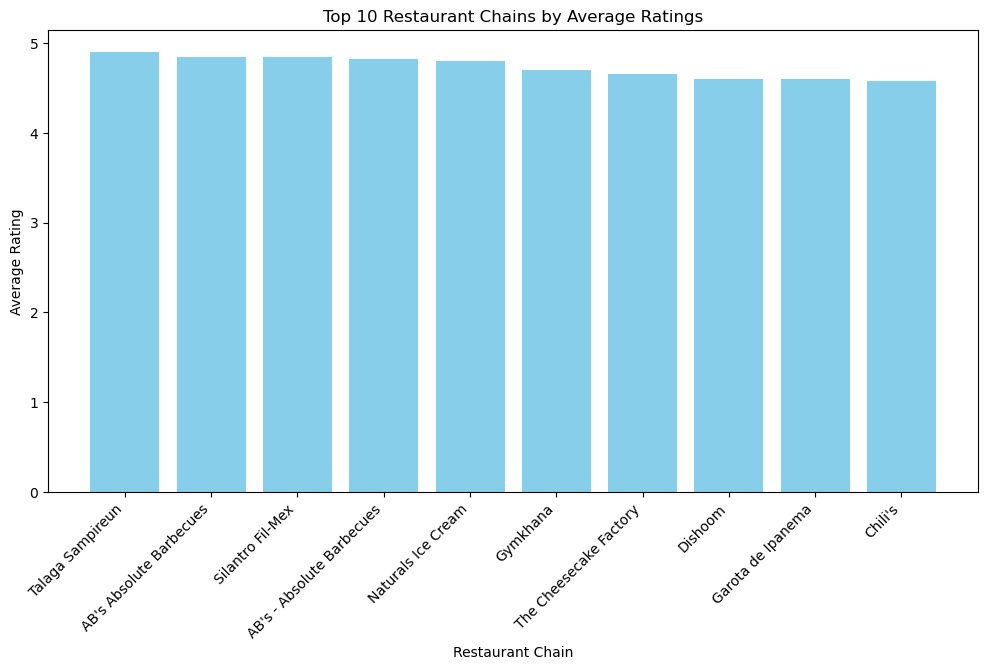

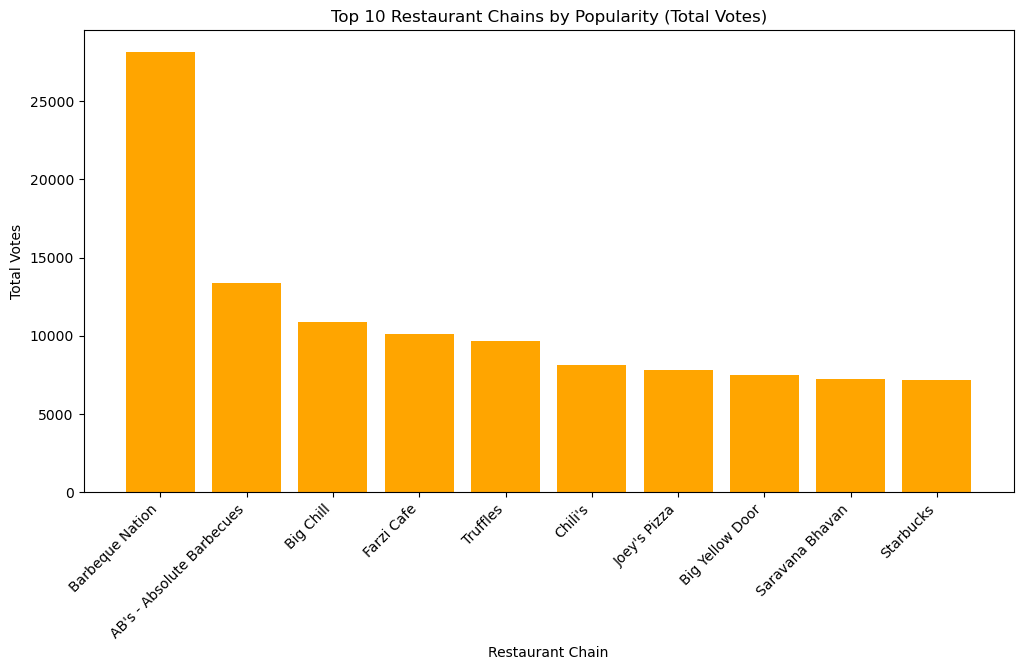

In [22]:

restaurant_name_column = 'Restaurant Name'

restaurant_chains = df[restaurant_name_column].value_counts()[df[restaurant_name_column].value_counts() > 1].index

chain_ratings = {}
chain_popularity = {}

for chain in restaurant_chains:
    chain_df = df[df[restaurant_name_column] == chain]
    
    
    average_rating = chain_df['Aggregate rating'].mean()
    chain_ratings[chain] = average_rating
    

    total_votes = chain_df['Votes'].sum()
    chain_popularity[chain] = total_votes


top_10_ratings = dict(sorted(chain_ratings.items(), key=lambda item: item[1], reverse=True)[:10])


top_10_popularity = dict(sorted(chain_popularity.items(), key=lambda item: item[1], reverse=True)[:10])


plt.figure(figsize=(12, 6))
plt.bar(top_10_ratings.keys(), top_10_ratings.values(), color='skyblue')
plt.title('Top 10 Restaurant Chains by Average Ratings')
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_10_popularity.keys(), top_10_popularity.values(), color='orange')
plt.title('Top 10 Restaurant Chains by Popularity (Total Votes)')
plt.xlabel('Restaurant Chain')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.show()
